find some data
https://github.com/dronedeploy/dd-ml-segmentation-benchmark/blob/master/libs/datasets.py


In [3]:
# !wget https://dl.dropboxusercontent.com/s/r0dj9mhyv4bgbme/dataset-medium.tar.gz

!wget https://dl.dropboxusercontent.com/s/h8a8kev0rktf4kq/dataset-sample.tar.gz

--2020-05-05 18:41:48--  https://dl.dropboxusercontent.com/s/h8a8kev0rktf4kq/dataset-sample.tar.gz
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.8.6, 2620:100:6018:6::a27d:306
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.8.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 418980035 (400M) [application/octet-stream]
Saving to: ‘dataset-sample.tar.gz’

dataset-sample.tar. 100%[===================>] 399.57M  36.0MB/s    in 11s     

2020-05-05 18:42:00 (35.7 MB/s) - ‘dataset-sample.tar.gz’ saved [418980035/418980035]



In [6]:
%ls

dataset-sample.tar.gz  sample_data/


extract tar
https://www.cyberciti.biz/faq/tar-extract-linux/

In [7]:
!tar -xzvf /content/dataset-sample.tar.gz

dataset-sample/
dataset-sample/elevations/
dataset-sample/elevations/e1d3e6f6ba_B4DE0FB544INSPIRE-elev.tif
dataset-sample/elevations/ec09336a6f_06BA0AF311OPENPIPELINE-elev.tif
dataset-sample/elevations/1d4fbe33f3_F1BE1D4184INSPIRE-elev.tif
dataset-sample/images/
dataset-sample/images/1d4fbe33f3_F1BE1D4184INSPIRE-ortho.tif
dataset-sample/images/ec09336a6f_06BA0AF311OPENPIPELINE-ortho.tif
dataset-sample/images/e1d3e6f6ba_B4DE0FB544INSPIRE-ortho.tif
dataset-sample/index.csv
dataset-sample/labels/
dataset-sample/labels/ec09336a6f_06BA0AF311OPENPIPELINE-label.png
dataset-sample/labels/1d4fbe33f3_F1BE1D4184INSPIRE-label.png
dataset-sample/labels/e1d3e6f6ba_B4DE0FB544INSPIRE-label.png


get libraries 

In [8]:
%cd /content/dataset-sample

/content/dataset-sample


In [9]:
!find .

.
./labels
./labels/ec09336a6f_06BA0AF311OPENPIPELINE-label.png
./labels/e1d3e6f6ba_B4DE0FB544INSPIRE-label.png
./labels/1d4fbe33f3_F1BE1D4184INSPIRE-label.png
./elevations
./elevations/e1d3e6f6ba_B4DE0FB544INSPIRE-elev.tif
./elevations/1d4fbe33f3_F1BE1D4184INSPIRE-elev.tif
./elevations/ec09336a6f_06BA0AF311OPENPIPELINE-elev.tif
./index.csv
./images
./images/e1d3e6f6ba_B4DE0FB544INSPIRE-ortho.tif
./images/1d4fbe33f3_F1BE1D4184INSPIRE-ortho.tif
./images/ec09336a6f_06BA0AF311OPENPIPELINE-ortho.tif


In [10]:
import glob
imagePaths = glob.glob('images/*')
print(imagePaths)

['images/e1d3e6f6ba_B4DE0FB544INSPIRE-ortho.tif', 'images/1d4fbe33f3_F1BE1D4184INSPIRE-ortho.tif', 'images/ec09336a6f_06BA0AF311OPENPIPELINE-ortho.tif']


In [11]:
!pip install tifffile

     |████████████████████████████████| 133kB 3.4MB/s 
     |████████████████████████████████| 18.1MB 243kB/s 


(841, 593, 4)
255 0
(555, 297, 4)
255 0
(497, 727, 4)
255 0


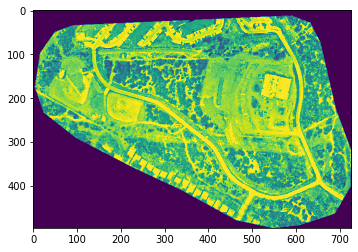

In [12]:
import tifffile
import numpy as np
from matplotlib import pyplot as plt
import os

images = []
for imagePath in imagePaths:
  image = tifffile.imread(imagePath)[::10,::10]
  images.append(image)
  
  print(image.shape)
  print(image.max(), image.min())
  plt.imshow(image[:,:,2], vmin=10, vmax=200)
  
# cube = np.dstack(images)


In [13]:
import pandas as pd

imageInfo = pd.read_csv('index.csv', sep=' ')

print(imageInfo)

  status                               name  ...  percentage_car  percentage_ignore
0   GOOD       1d4fbe33f3_F1BE1D4184INSPIRE  ...            0.09              18.08
1   GOOD       e1d3e6f6ba_B4DE0FB544INSPIRE  ...            0.12              46.47
2   GOOD  ec09336a6f_06BA0AF311OPENPIPELINE  ...            0.17              31.71

[3 rows x 12 columns]


In [0]:
imageInfo['path_images'] = './images/'+imageInfo['name']+'-ortho.tif'
imageInfo['path_elevation'] = './elevations/'+imageInfo['name']+'-elev.tif'
imageInfo['path_labels'] = './labels/'+imageInfo['name']+'-label.png'

In [15]:
imageNames = imageInfo['name']
print(imageNames)

for index, row in imageInfo.iterrows():
  print(row)

0         1d4fbe33f3_F1BE1D4184INSPIRE
1         e1d3e6f6ba_B4DE0FB544INSPIRE
2    ec09336a6f_06BA0AF311OPENPIPELINE
Name: name, dtype: object
status                                                                GOOD
name                                          1d4fbe33f3_F1BE1D4184INSPIRE
rows                                                                  5542
cols                                                                  2962
visible_classes                                                          7
percentage_building                                                  21.52
percentage_clutter                                                    0.41
percentage_vegetation                                                15.42
percentage_water                                                      1.63
percentage_ground                                                    42.85
percentage_car                                                        0.09
percentage_ignore               

https://scikit-learn.org/stable/modules/ensemble.html

In [16]:
imageInfo_training = imageInfo.iloc[1:]
imageInfo_control = imageInfo.iloc[:1]

print(imageInfo_training)

  status  ...                                        path_labels
1   GOOD  ...    ./labels/e1d3e6f6ba_B4DE0FB544INSPIRE-label.png
2   GOOD  ...  ./labels/ec09336a6f_06BA0AF311OPENPIPELINE-lab...

[2 rows x 15 columns]


make a big array

In [17]:
sampleCount = int((imageInfo_training.rows*imageInfo.cols).sum())
# sampleCount = imageInfo_training.rows.sum()*imageInfo.cols.sum()
print(sampleCount)

85886608


In [0]:
featureCount = 4 #R, G, B, Elevation

In [19]:
sampleCount * featureCount * 8 /8e+9

0.343546432

In [0]:
INV_LABELMAP = {
    (255,   0, 255) : 0,
    (75,   25, 230) : 1,
    (180,  30, 145) : 2,
    (75,  180,  60) : 3,
    (48,  130, 245) : 4,
    (255, 255, 255) : 5,
    (200, 130,   0) : 6,
}

INV_LABELMAP_RGB = {
    (255, 0, 255) : 0,
    (230, 25, 75) : 1,
    (145, 30, 180) : 2,
    (60, 180, 75) : 3,
    (245, 130,48) : 4,
    (255, 255, 255) : 5,
    (0,130,200) : 6,
}

# LABELMAP = {
#     0 : [255,   0, 255],
#     1 : [75,   25, 230],
#     2 : [180,  30, 145],
#     3 : [75,  180,  60],
#     4 : [48,  130, 245],
#     5 : [255, 255, 255],
#     6 : [200, 130,   0],
# }

labelVals = [0,1,2,3,4,5,6]

labelRGB = np.array([[255,   0, 255],
                    [75,   25, 230],
                    [180,  30, 145],
                    [75,  180,  60],
                    [48,  130, 245],
                    [255, 255, 255],
                    [200, 130,   0]])

# classNumbers = [0,1,2,3,4,5,6]
# classRGB = [[255,   0, 255],
#             [75,   25, 230],
#             [180,  30, 145],
#             [75,  180,  60],
#             [48,  130, 245]]

In [78]:
!pip install numpy-indexed

help from https://stackoverflow.com/questions/42750910/convert-rgb-image-to-index-image/42751003#42751003

In [0]:
def rgb2index(rgb, color2index=INV_LABELMAP_RGB):
    """
    turn a 3 channel RGB color to 1 channel index color
    """
    return color2index[tuple(rgb)]

In [166]:
#grid sampling

inputArrays0 = []
inputArrays1 = []
inputArrays2 = []
targetArrays = []

reduction = 30

for index, row in imageInfo_training.iterrows():
  # array_label = plt.imread(row.path_labels)
  import imageio
  array_label = imageio.imread(row.path_labels)[::reduction,::reduction,:]


  # import numpy_indexed as npi
  # array_label2 = npi.remap(array_label, list(LABELMAP.values()), list(LABELMAP.keys()))
  # array_label2 = npi.remap(array_label, labelRGB, labelVals)

  # array_label2 = np.take_along_axis(array_label, labelRGB, axis=0)

  array_label2 = np.apply_along_axis(rgb2index, 2, array_label)
  
  targetArrays.append(array_label2.flatten())

  array_image = tifffile.imread(row.path_images)[::reduction,::reduction,:]

  inputArrays0.append(array_image[:,:,0].flatten())
  inputArrays1.append(array_image[:,:,1].flatten())
  inputArrays2.append(array_image[:,:,2].flatten())

  print(array_label.dtype)
  print(array_label.shape)
  print(np.unique(array_label))
  print(array_label2.shape)
  print(np.unique(array_label2))

inputArray0 = np.hstack(inputArrays0)
inputArray1 = np.hstack(inputArrays1)
inputArray2 = np.hstack(inputArrays2)
inputArray = np.vstack([inputArray0,inputArray1,inputArray2]).T
targetArray = np.hstack(targetArrays)

print(inputArray.shape)
print(targetArray.shape)

AttributeError: ignored

status                                                                GOOD
name                                          e1d3e6f6ba_B4DE0FB544INSPIRE
rows                                                                  8408
cols                                                                  5924
visible_classes                                                          7
percentage_building                                                   3.43
percentage_clutter                                                     1.1
percentage_vegetation                                                 4.44
percentage_water                                                      1.51
percentage_ground                                                    42.94
percentage_car                                                        0.12
percentage_ignore                                                    46.47
path_images                ./images/e1d3e6f6ba_B4DE0FB544INSPIRE-ortho.tif
path_elevation           

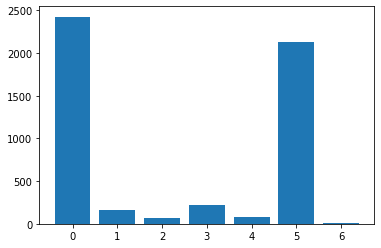

In [171]:
#class sampling
row = imageInfo.iloc[1]
print(row)

reduction = 100
count = 50

import imageio
array_label = imageio.imread(row.path_labels)[::reduction,::reduction,:]
array_label = np.apply_along_axis(rgb2index, 2, array_label)
# array_label_flat = array_label.reshape(-1, array_label.shape[-1])

array_label_flat = array_label.flatten()
array_image = tifffile.imread(row.path_images)[::reduction,::reduction,:]
array_image_flat = array_image.reshape(-1, array_image.shape[-1])

labels, counts = np.unique(array_label,return_counts=True)

print(labels)
print(counts)
plt.bar(labels, counts)

targetArrays = []
inputArrays = []
for label in labels:
  # array_label_flat2 = array_label_flat.copy()
  labelSubset = array_label_flat[array_label_flat==label][:count]
  targetArrays.append(labelSubset)
  featureSubset = array_image_flat[array_label_flat==label,:][:count,:]
  inputArrays.append(featureSubset)

inputArray = np.vstack(inputArrays)
targetArray = np.hstack(targetArrays)

# sorter =  np.argsort(array_label_flat)

# array_label_flat = array_label_flat[sorter]
# # plt.plot(array_label_flat)

# array_image = tifffile.imread(row.path_images)[::reduction,::reduction,:]
# array_image_flat = array_image.reshape(-1, array_image.shape[-1])



(array([50., 50.,  0., 50.,  0., 50., 50.,  0., 50.,  4.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

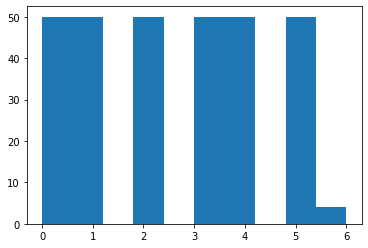

In [172]:
plt.hist(targetArray)

In [0]:
#throw away nans

nanMask = targetArray==0

targetArray = targetArray[~nanMask]
inputArray = inputArray[~nanMask,:]

(array([ 3078.,     0.,  1126.,     0., 11348.,     0.,   834.,     0.,
            0.,   135.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

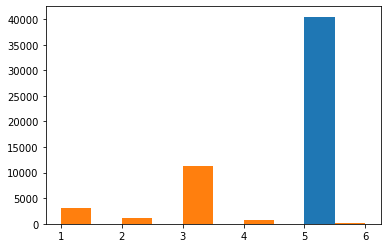

In [70]:
#remove ground
plt.hist(targetArray)

nanMask = targetArray==5

targetArray = targetArray[~nanMask]
inputArray = inputArray[~nanMask,:]

plt.hist(targetArray)



In [173]:

from sklearn.ensemble import GradientBoostingClassifier
# X_train, X_test = X[:2000], X[2000:]
# y_train, y_test = y[:2000], y[2000:]

X_train = inputArray
y_train = targetArray


# clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
#                                  max_depth=1, random_state=0,verbose=1).fit(X_train, y_train)

clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01,
                                 max_depth=1, random_state=0,verbose=1).fit(X_train, y_train)



# clf.score(X_test, y_test)

      Iter       Train Loss   Remaining Time 
         1         554.6095            9.03s
         2         550.5568            7.58s
         3         546.6536            6.72s
         4         542.8889            6.14s
         5         539.2527            5.78s
         6         535.7365            5.61s
         7         532.3326            5.44s
         8         529.0339            5.39s
         9         525.8344            5.28s
        10         522.7273            5.19s
        20         495.8114            4.86s
        30         474.4745            4.55s
        40         456.9576            4.36s
        50         442.1144            4.30s
        60         429.2896            4.23s
        70         417.9281            4.14s
        80         407.8692            4.07s
        90         398.8238            4.01s
       100         390.7141            4.04s
       200         337.6983            3.49s
       300         309.2140            3.02s
       40

In [0]:
def label2rgb(data):
  lut =np.array([[255, 0, 255],
      [230, 25, 75],
      [145, 30, 180],
      [60, 180, 75],
      [245, 130,48],
      [255, 255, 255],
      [0,130,200]])
  
  # lut = np.array(Image.open('images/lut.png'))[0] # note reduction in dimensions to save a [0] inside the take()
  # data = np.array(Image.open('images/thermal_gray.jpg'))
  data_colour = np.zeros(data.shape + (3,), dtype=np.uint8)
  data_colour = np.take(lut, data, axis=0, out=data_colour)

  return data_colour

(498713,)


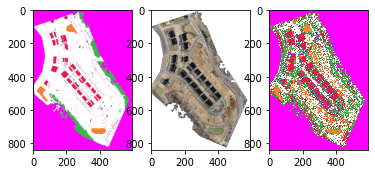

In [174]:
reduction = 10

# for index, row in imageInfo_control.iterrows():
row = imageInfo.iloc[1]
# for index, row in imageInfo_training.iterrows():
array_image = tifffile.imread(row.path_images)[::reduction,::reduction,:]
array_image = array_image[:,:,0:4]
inshape = array_image.shape
array_image_flat = array_image.reshape(-1, array_image.shape[-1])
array_image_flat = clf.predict(array_image_flat)
print(array_image_flat.shape)
plt.subplot(131)
array_label = imageio.imread(row.path_labels)[::reduction,::reduction,:]
plt.imshow(array_label)
plt.subplot(132)
plt.imshow(array_image)
plt.subplot(133)
resultArray = array_image_flat.reshape(inshape[0:2])
resultArray = label2rgb(resultArray)
plt.imshow(resultArray, interpolation='nearest')
  
  

or we can precompute the size...

In [0]:
# featureArraySize = [100000,featureCount]
inputArraySize = [sampleCount,featureCount]
inputArray = np.zeros(featureArraySize, dtype=np.uint8)

targetArray = np.zeros(sampleCount, dtype=np.uint8)

./images/1d4fbe33f3_F1BE1D4184INSPIRE-ortho.tif
./elevations/1d4fbe33f3_F1BE1D4184INSPIRE-elev.tif
./labels/1d4fbe33f3_F1BE1D4184INSPIRE-label.png
./images/e1d3e6f6ba_B4DE0FB544INSPIRE-ortho.tif
./elevations/e1d3e6f6ba_B4DE0FB544INSPIRE-elev.tif
./labels/e1d3e6f6ba_B4DE0FB544INSPIRE-label.png
./images/ec09336a6f_06BA0AF311OPENPIPELINE-ortho.tif
./elevations/ec09336a6f_06BA0AF311OPENPIPELINE-elev.tif
./labels/ec09336a6f_06BA0AF311OPENPIPELINE-label.png


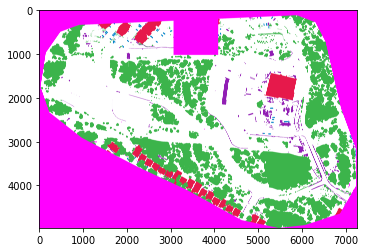

In [112]:
for index, row in imageInfo.iterrows():
  print(row.path_images)        
  print(row.path_elevation)       
  print(row.path_labels)         

  image = tifffile.imread(row.path_images)
  elevation = tifffile.imread(row.path_elevation)
  label = plt.imread(row.path_labels)

  plt.imshow(label)
